In [1]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np


In [2]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import pickle
print("Gpu",tf.test.gpu_device_name())

Gpu /device:GPU:0


# Path de trabajo

In [3]:
path="C:\\Users\\chris\\Documents\\Assignment5\\img-classs"

In [4]:
pathToImagesTrain=path+"\\seg_train\\seg_train"
pathToImagesTest=path+"\\seg_test\\seg_test"

# Se transforma la imagen 

In [52]:
def resizeImages(imagesArray,dim=128):
    newArray=[]
    for image in imagesArray:
        newArray.append(cv2.resize(image, (dim, dim)))
    return newArray

In [53]:
exampleImg=cv2.imread(pathToImagesTrain+"\\buildings\\0.jpg")

In [7]:
#imagen con reshape de 256

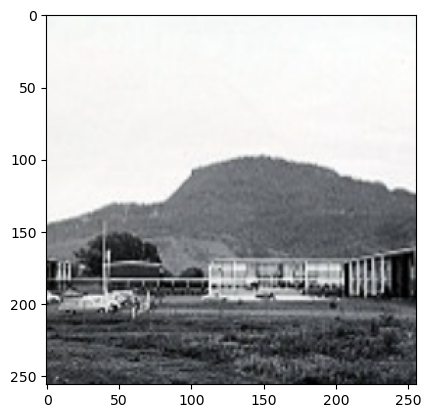

In [8]:
resized256=resizeImages([exampleImg],256)
plt.imshow(resized256[0])
plt.show()

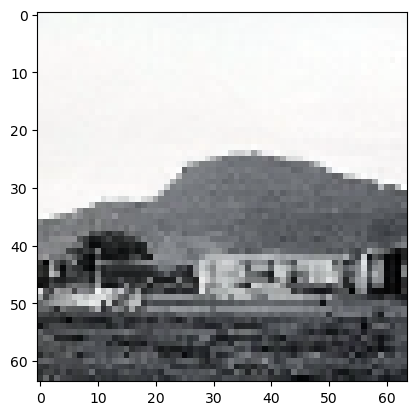

In [9]:
resized64=resizeImages([exampleImg],64)
plt.imshow(resized64[0])
plt.show()

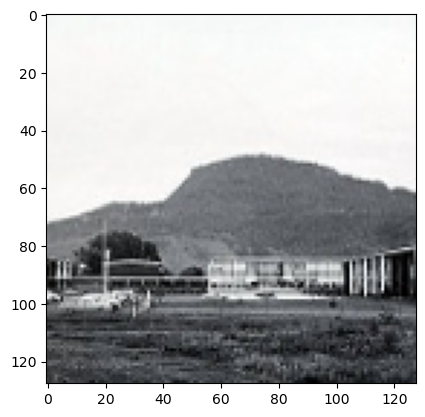

In [10]:
resized128=resizeImages([exampleImg],128)
plt.imshow(resized128[0])
plt.show()

In [11]:
#Viendo las imagenes llegamos a la conclusion que podemos usar el tamanho 128 ya que no se pierde la calidad de la imagen como es el caso de 64 ni se agregan pixeles falsos como el caso de 256

In [12]:
#funciones para obtener las imagenes

In [65]:
def getImagesFromAFolder(imgDirectory,resize=False):
    imgArray=[]
    for img in os.listdir(imgDirectory):
        image=cv2.imread(os.path.join(imgDirectory,img))
        imgDim = cv2.resize(image, (150, 150))
        imgArray.append(imgDim)
    if (resize): return resizeImages(imgArray)
    
    print(np.array(imgArray).shape)
    return imgArray

def getFolderNamesFromDirectory(directory):
    folderNames = []
    for name in os.listdir(directory):
        route = os.path.join(directory, name)
        if os.path.isdir(route):
            folderNames.append(name)
    return folderNames


def getImagesFromEachFolder(pathToImages):
    imgClasses = getFolderNamesFromDirectory(pathToImages)
    classId=0
    totalImgs=0
    X = []
    Y = []
    print(imgClasses)
    for imgClass in imgClasses:
        print(imgClass)
        imgsFromClass=getImagesFromAFolder(pathToImages+"\\"+imgClass,True)
        classLabels = np.ones(len(imgsFromClass))
        totalImgs+=len(imgsFromClass)
        classLabels=classLabels*classId
        classId+=1
        X.extend(imgsFromClass)
        Y.extend(classLabels)
    X = np.array(X)
    Y = np.array(Y)
    X = X.reshape((totalImgs, 128, 128, 3))
    return (X,Y)
        

In [66]:
#X_Train,Y_Train=getImagesFromEachFolder(pathToImagesTrain)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
buildings
forest
glacier
mountain
sea
street


In [56]:
#X_Test,Y_Test=getImagesFromEachFolder(pathToImagesTest)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']
buildings
forest
glacier
mountain
sea
street
3000


In [6]:
def saveDataPickle(name,data):
    with open(name, 'wb') as file:
        pickle.dump(data, file)
        file.close()
def loadDataPickle(name):
    with open(name, 'rb') as file:
        data = pickle.load(file)
    return data


In [7]:
#saveDataPickle('xTrain.Pickle',X_Train)
#saveDataPickle('yTrain.Pickle',Y_Train)
#saveDataPickle('xTest.Pickle',X_Test)
#saveDataPickle('yTest.Pickle',Y_Test)

In [8]:
X_Train=loadDataPickle('xTrain.Pickle')
Y_Train=loadDataPickle('yTrain.Pickle')
X_Test=loadDataPickle('xTest.Pickle')
Y_Test=loadDataPickle('yTest.Pickle')

In [9]:
#Creating model
print(X_Train.shape)

(14034, 128, 128, 3)


In [10]:
model = Sequential()
model.add(Conv2D(64, (3,3), input_shape = (128,128,3),padding='same'))
model.add(Activation("relu")) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(32, (3,3)),padding='same')
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Dense (6, activation=tf.nn.softmax))
model.compile(loss='sparse_categorical_crossentropy',
                optimizer="adam",
                metrics=['accuracy'])


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 64)      1792      
                                                                 
 activation (Activation)     (None, 128, 128, 64)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 62, 62, 32)        18464     
                                                                 
 activation_1 (Activation)   (None, 62, 62, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                    

In [12]:
history =model.fit(X_Train, Y_Train, batch_size=32, epochs=10,validation_data=(X_Test, Y_Test) )

Epoch 1/10
439/439 [==============================] - 22s 41ms/step - loss: 18.8205 - accuracy: 0.1963 - val_loss: 1.7911 - val_accuracy: 0.1783
Epoch 2/10
439/439 [==============================] - 16s 36ms/step - loss: 1.7764 - accuracy: 0.2071 - val_loss: 1.8062 - val_accuracy: 0.1867
Epoch 3/10
439/439 [==============================] - 16s 36ms/step - loss: 1.7354 - accuracy: 0.2411 - val_loss: 1.7982 - val_accuracy: 0.2463
Epoch 4/10
439/439 [==============================] - 17s 38ms/step - loss: 1.6538 - accuracy: 0.2978 - val_loss: 1.7515 - val_accuracy: 0.3220
Epoch 5/10
439/439 [==============================] - 16s 36ms/step - loss: 1.4790 - accuracy: 0.3792 - val_loss: 1.6484 - val_accuracy: 0.3243
Epoch 6/10
439/439 [==============================] - 16s 36ms/step - loss: 1.3744 - accuracy: 0.4307 - val_loss: 1.9979 - val_accuracy: 0.2820
Epoch 7/10
439/439 [==============================] - 16s 36ms/step - loss: 1.2693 - accuracy: 0.4827 - val_loss: 2.0713 - val_accuracy

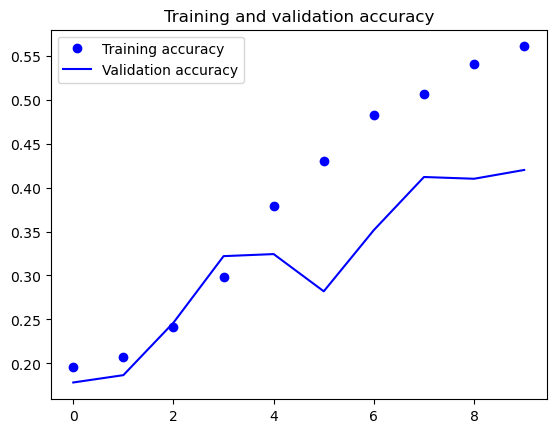

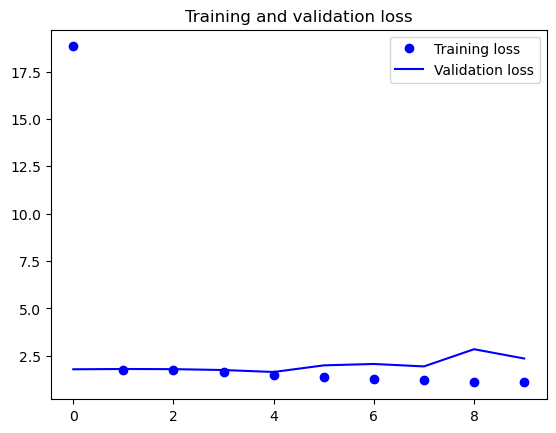

In [13]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [67]:
print(X_Train[0].shape)

(128, 128, 3)


In [68]:
print(Y_Test.shape)

(3000,)


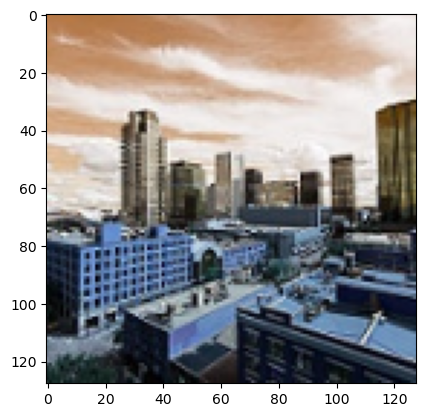

In [71]:
plt.imshow(X_Train[1])
plt.show()

In [91]:
print(Y[69])

0.0


In [46]:
imgsArray=getImagesFromAFolder(pathToImagesTrain+"\\buildings",True)


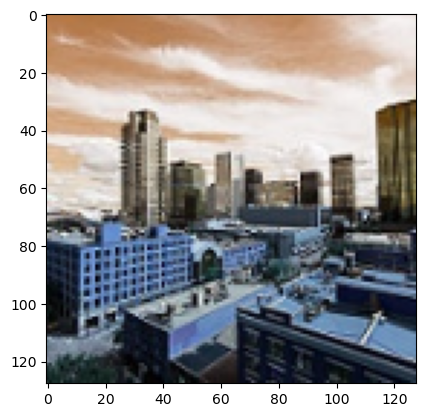

In [31]:
plt.imshow(imgsArray[1])
plt.show()